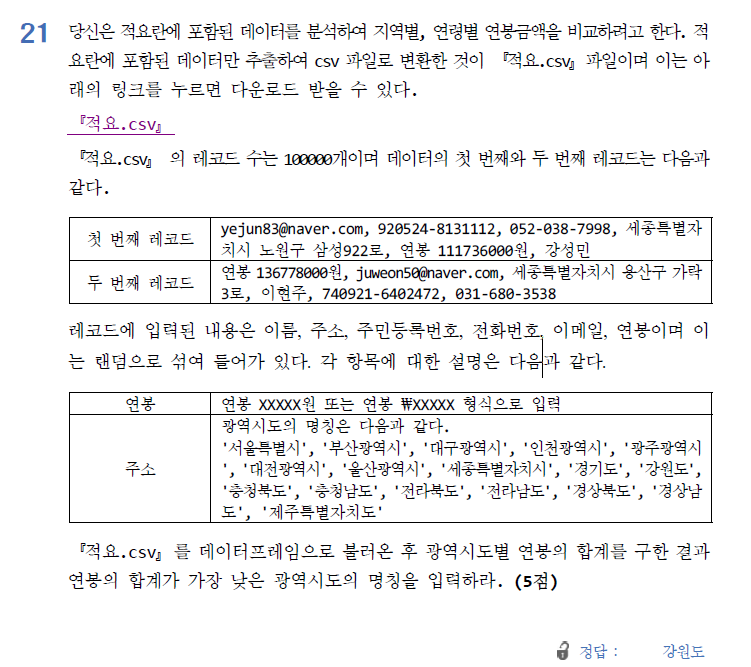

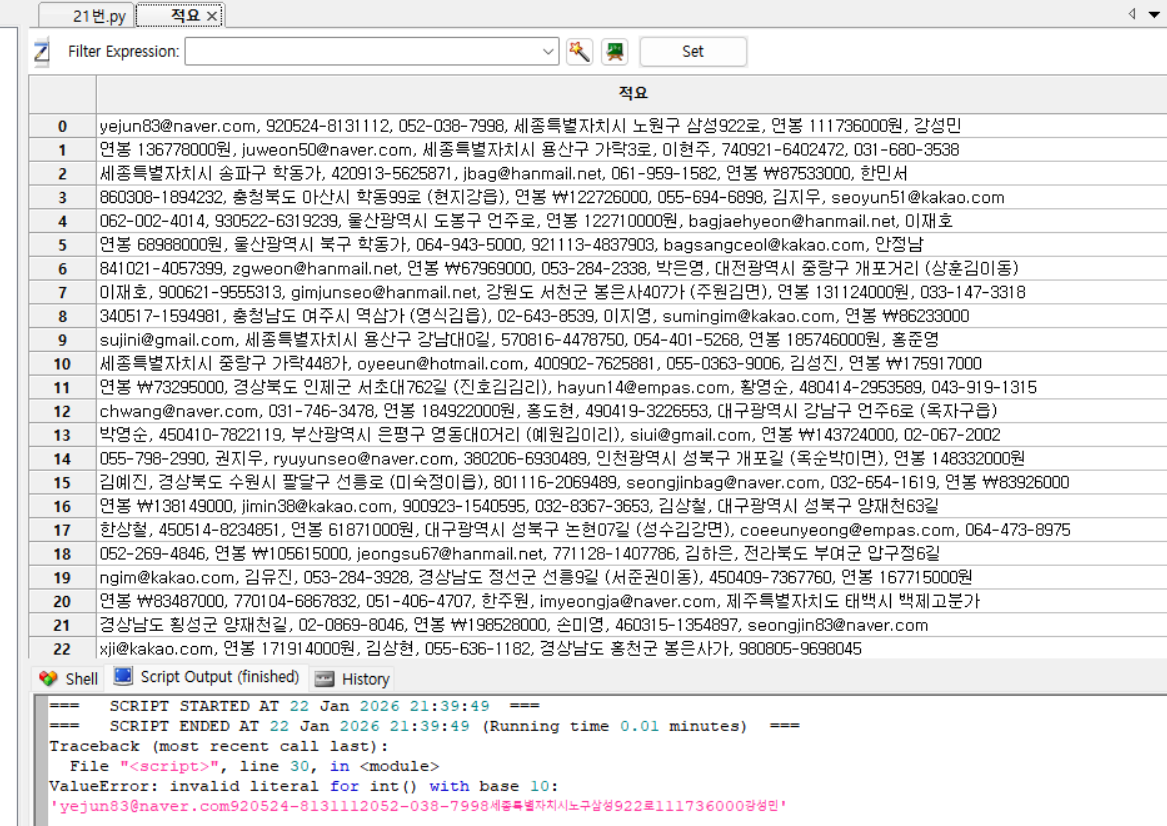

In [ ]:
import numpy
print(numpy)
print(numpy.__file__)


: 

In [ ]:
import pandas as pd
import re

# 1. CSV 불러오기 (한 줄 전체를 하나의 컬럼으로)
df = pd.read_csv("C:/Users/USER/Desktop/적요.csv", header=None, names=["raw"])

# 2. 광역시·도 목록
regions = [
    "서울특별시", "부산광역시", "대구광역시", "인천광역시", "광주광역시",
    "대전광역시", "울산광역시", "세종특별자치시",
    "경기도", "강원도", "충청북도", "충청남도",
    "전라북도", "전라남도", "경상북도", "경상남도", "제주특별자치도"
]

# 3. 광역시·도 추출 함수
def extract_region(text):
    for r in regions:
        if r in text:
            return r
    return None

# 4. 연봉 추출 함수 (₩, 원 제거)
def extract_salary(text):
    match = re.search(r"연봉\s*₩?([\d,]+)", text)
    if match:
        return int(match.group(1).replace(",", ""))
    return None

# 5. 컬럼 생성
df["region"] = df["raw"].apply(extract_region)
df["salary"] = df["raw"].apply(extract_salary)

# 6. 결측치 제거
df = df.dropna(subset=["region", "salary"])

# 7. 광역시·도별 연봉 합계
salary_sum = df.groupby("region")["salary"].sum()

# 8. 연봉 합계가 가장 낮은 광역시·도
result = salary_sum.idxmin()

print(result)
